<a href="https://colab.research.google.com/github/kty3452/ML-Class/blob/main/week3/wisdomDatasetCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드 및 탐색

### Subtask:
지정된 파일에서 데이터를 로드하고 구조 및 내용을 검사합니다.


**Reasoning**:
Load the data from the specified file into a pandas DataFrame, displaying the first few rows, and showing the info and description of the DataFrame, as well as the value counts of the 'activity' column.



In [102]:
import pandas as pd

# Manually read and parse the data line by line
# 데이터를 줄 단위로 수동으로 읽고 구문 분석합니다.
data = []
with open('/content/drive/MyDrive/ML_Class/WISDM_ar_v1.1_raw.txt', 'r') as f:
    for line in f:
        # Remove trailing whitespace and the potential semicolon
        # 후행 공백과 있을 수 있는 세미콜론을 제거합니다.
        line = line.strip().replace(';', '')
        # Split the line by comma
        # 쉼표로 줄을 분할합니다.
        parts = line.split(',')
        # Check if the line has the expected number of parts (6)
        # 줄에 예상되는 부분 수(6)가 있는지 확인합니다.
        if len(parts) == 6:
            try:
                # Convert parts to appropriate data types
                # 부분을 적절한 데이터 유형으로 변환합니다.
                user = int(parts[0])
                activity = parts[1]
                timestamp = int(parts[2])
                x = float(parts[3])
                y = float(parts[4])
                z = float(parts[5])
                data.append([user, activity, timestamp, x, y, z])
            except ValueError:
                # Skip lines with incorrect data types
                # 잘못된 데이터 유형의 줄은 건너뜁니다.
                continue
        else:
             # Optionally, print lines that don't have 6 parts to understand the issue
             # 문제를 이해하기 위해 6개 부분이 없는 줄을 선택적으로 출력할 수 있습니다.
             # print(f"Skipping line with unexpected number of fields: {line}")
             continue

# Create a DataFrame from the parsed data
# 구문 분석된 데이터로 DataFrame을 만듭니다.
df_raw = pd.DataFrame(data, columns=['user', 'activity', 'timestamp', 'x', 'y', 'z'])

# Display the first 5 rows to verify data loading
# 수동 구문 분석 후 데이터 로드를 확인하기 위해 처음 5개 행을 표시합니다.
print("First 5 rows of the DataFrame after manual parsing:")
display(df_raw.head())

# Print the DataFrame's info to check column types and non-null counts
# 수동 구문 분석 후 열 유형 및 null이 아닌 개수를 확인하기 위해 DataFrame 정보 출력
print("\nDataFrame Info after manual parsing:")
df_raw.info()

# Print descriptive statistics to understand the distribution of numerical columns
# 수동 구문 분석 후 숫자 열의 분포를 이해하기 위해 기술 통계 출력
print("\nDataFrame Description after manual parsing:")
display(df_raw.describe())

# Check unique activity types and their counts
# 수동 구문 분석 후 고유 활동 유형 및 개수 확인
print("\nActivity counts after manual parsing:")
display(df_raw['activity'].value_counts())

First 5 rows of the DataFrame after manual parsing:


user activity       timestamp         x          y         z
0    33  Jogging  49105962326000 -0.694638  12.680544  0.503953
1    33  Jogging  49106062271000  5.012288  11.264028  0.953424
2    33  Jogging  49106112167000  4.903325  10.882658 -0.081722
3    33  Jogging  49106222305000 -0.612916  18.496431  3.023717
4    33  Jogging  49106332290000 -1.184970  12.108489  7.205164


DataFrame Info after manual parsing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086465 entries, 0 to 1086464
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086465 non-null  int64  
 1   activity   1086465 non-null  object 
 2   timestamp  1086465 non-null  int64  
 3   x          1086465 non-null  float64
 4   y          1086465 non-null  float64
 5   z          1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB

DataFrame Description after manual parsing:


user     timestamp             x             y             z
count  1.086465e+06  1.086465e+06  1.086465e+06  1.086465e+06  1.086465e+06
mean   1.883756e+01  3.250279e+13  6.641130e-01  7.246045e+00  3.976974e-01
std    1.026681e+01  4.893650e+13  6.876277e+00  6.739789e+00  4.761111e+00
min    1.000000e+00  0.000000e+00 -1.961000e+01 -1.961000e+01 -1.980000e+01
25%    1.000000e+01  1.999712e+12 -2.910000e+00  3.170000e+00 -2.220117e+00
50%    1.900000e+01  9.396203e+12  2.700000e-01  7.930000e+00  0.000000e+00
75%    2.800000e+01  3.509473e+13  4.440000e+00  1.156000e+01  2.720000e+00
max    3.600000e+01  2.093974e+14  1.995000e+01  2.004000e+01  1.961000e+01


Activity counts after manual parsing:


activity
Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: count, dtype: int64

## 데이터 전처리

### Subtask:
CNN 모델에 맞게 데이터를 전처리합니다. 여기에는 누락된 값 처리, 데이터 스케일링, 시계열 데이터를 CNN 입력 형식에 맞게 재구성하는 작업이 포함될 수 있습니다.


**Reasoning**:
The first step is to convert the 'timestamp' column to datetime objects.



In [103]:
# Convert the 'timestamp' column to datetime objects
# The timestamp values appear to be in microseconds or nanoseconds since the epoch.
# Assuming microseconds based on the scale, convert to seconds for datetime conversion.
# 'timestamp' 열을 datetime 객체로 변환합니다.
# 타임스탬프 값은 epoch 이후 마이크로초 또는 나노초 단위인 것으로 보입니다.
# 규모를 기준으로 마이크로초라고 가정하고 datetime 변환을 위해 초 단위로 변환합니다.
df_raw['timestamp_datetime'] = pd.to_datetime(df_raw['timestamp'], unit='us')

# Display the first few rows with the new column
# 새 열이 포함된 처음 몇 개 행을 표시합니다.
print("DataFrame with timestamp_datetime column:")
display(df_raw.head())

DataFrame with timestamp_datetime column:


user activity       timestamp         x          y         z  \
0    33  Jogging  49105962326000 -0.694638  12.680544  0.503953   
1    33  Jogging  49106062271000  5.012288  11.264028  0.953424   
2    33  Jogging  49106112167000  4.903325  10.882658 -0.081722   
3    33  Jogging  49106222305000 -0.612916  18.496431  3.023717   
4    33  Jogging  49106332290000 -1.184970  12.108489  7.205164   

       timestamp_datetime  
0 1971-07-23 08:32:42.326  
1 1971-07-23 08:34:22.271  
2 1971-07-23 08:35:12.167  
3 1971-07-23 08:37:02.305  
4 1971-07-23 08:38:52.290

**Reasoning**:
Now I will identify and handle duplicate entries in the DataFrame and check for any remaining missing values.



In [104]:
# Identify and handle duplicate entries
# 중복 항목 식별 및 처리
print("\nChecking for duplicate rows:")
print(f"Number of duplicate rows before dropping: {df_raw.duplicated().sum()}")

# Drop duplicate rows
# 중복 행을 삭제합니다.
df_raw.drop_duplicates(inplace=True)

print(f"Number of duplicate rows after dropping: {df_raw.duplicated().sum()}")

# 3. Handle missing values (double-check)
# 3. 누락된 값 처리 (재확인)
print("\nChecking for missing values after dropping duplicates:")
print(df_raw.isnull().sum())

# 4. Address potential semicolon issue in 'z' column (already handled in manual parsing, but verify data type)
# The manual parsing already ensured the 'z' column is float.
# We can double check the data type of 'z' column.
# 4. 'z' 열의 잠재적인 세미콜론 문제 해결 (수동 구문 분석에서 이미 처리되었지만 데이터 유형 확인)
# 수동 구문 분석을 통해 이미 'z' 열이 float인지 확인했습니다.
# 'z' 열의 데이터 유형을 다시 확인할 수 있습니다.
print("\nData type of 'z' column:")
print(df_raw['z'].dtype)


Checking for duplicate rows:
Number of duplicate rows before dropping: 66587
Number of duplicate rows after dropping: 0

Checking for missing values after dropping duplicates:
user                  0
activity              0
timestamp             0
x                     0
y                     0
z                     0
timestamp_datetime    0
dtype: int64

Data type of 'z' column:
float64


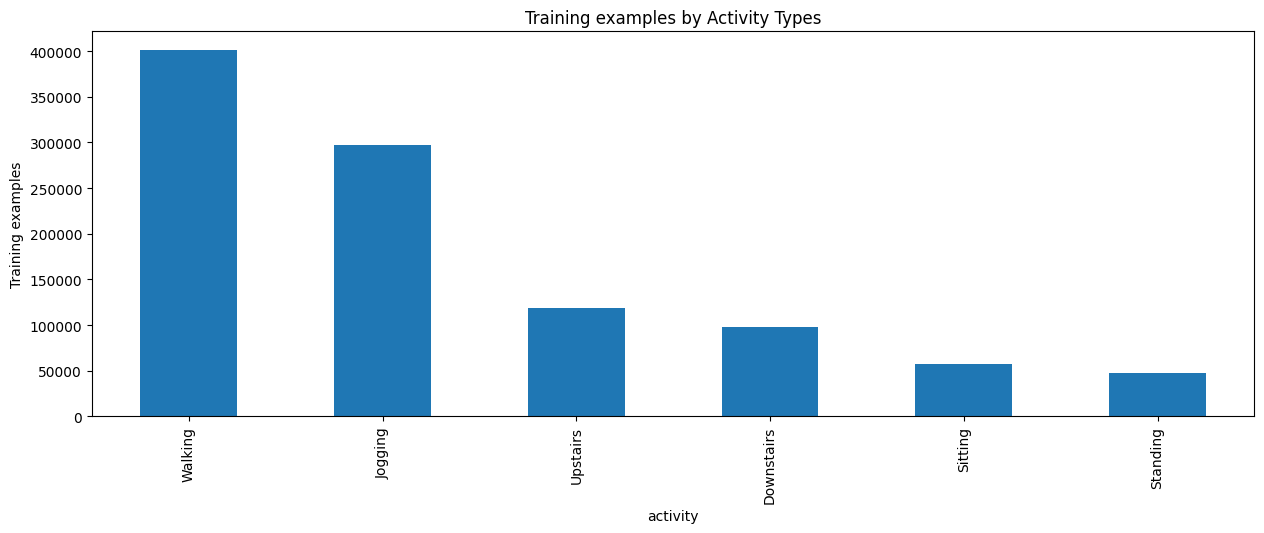

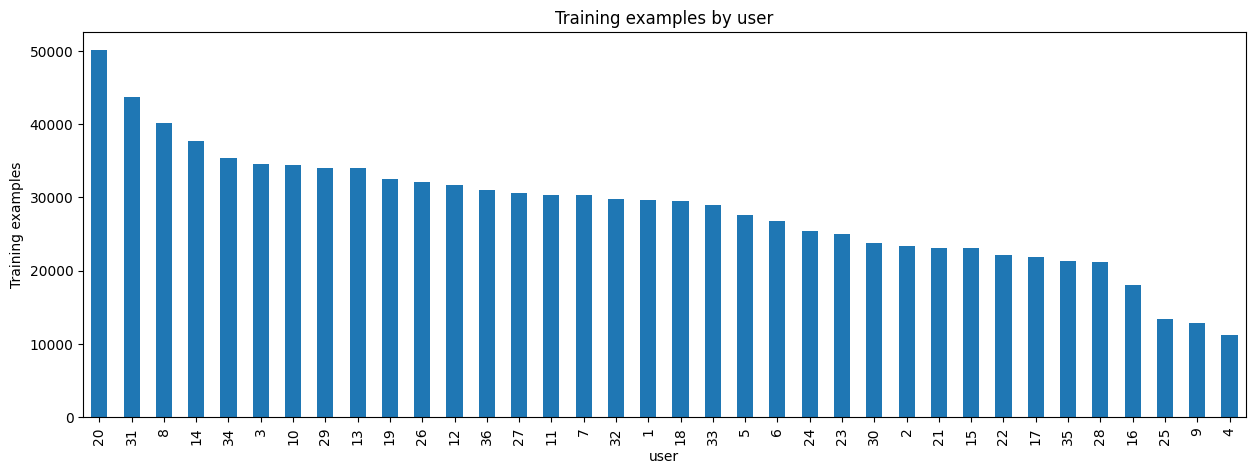

In [105]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.xlabel('Activity Type')
plt.ylabel('Training examples')
df_raw['activity'].value_counts().plot(kind='bar',
                                  title='Training examples by Activity Types')
plt.show()

plt.figure(figsize=(15, 5))
plt.xlabel('User')
plt.ylabel('Training examples')
df_raw['user'].value_counts().plot(kind='bar',
                                 title='Training examples by user')
plt.show()

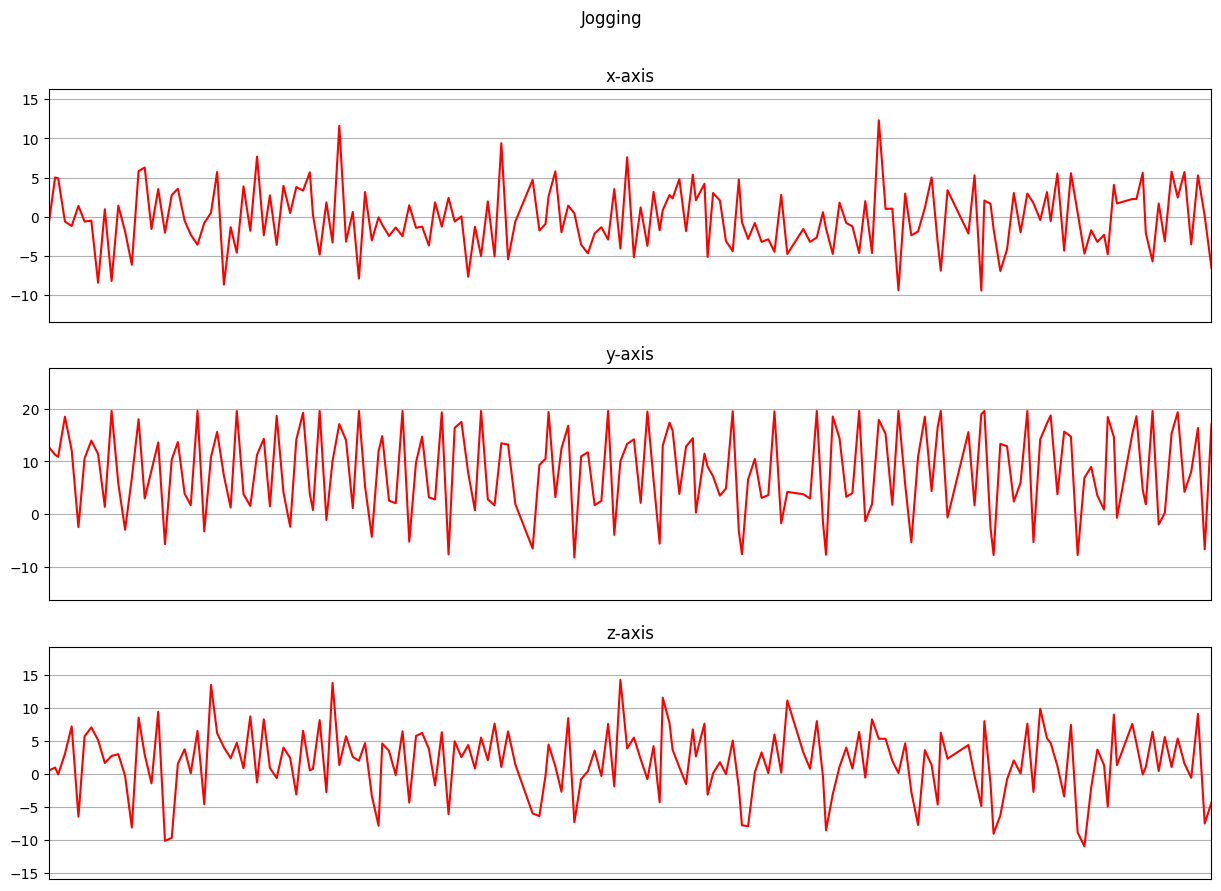

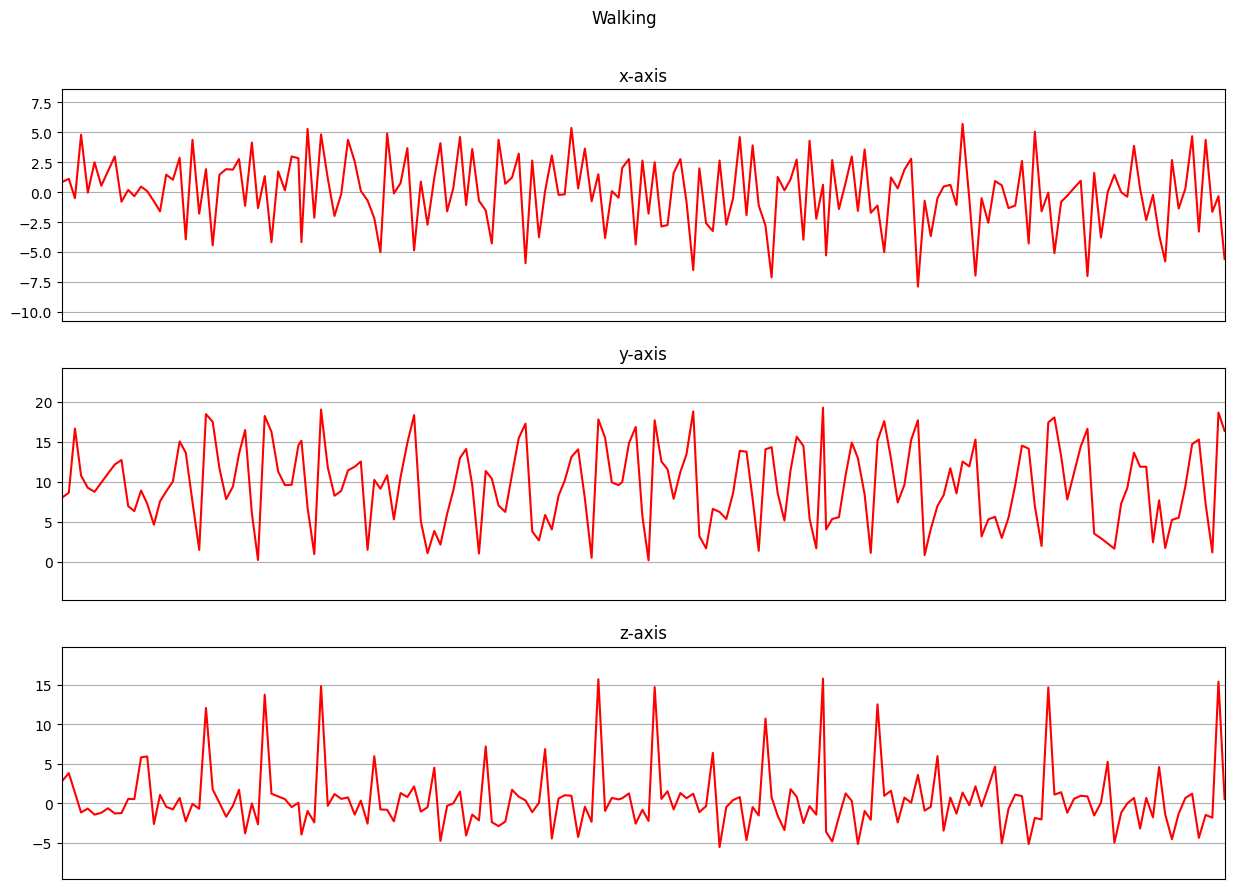

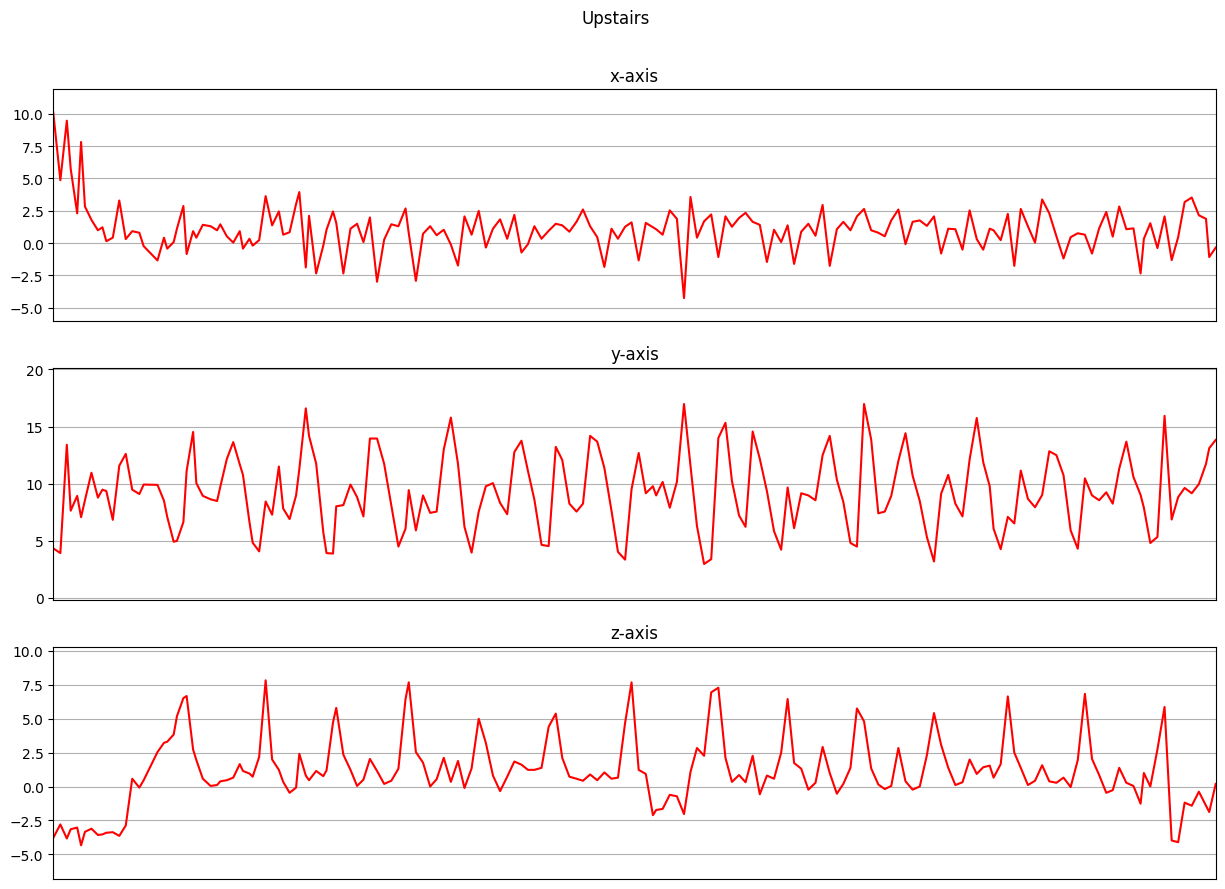

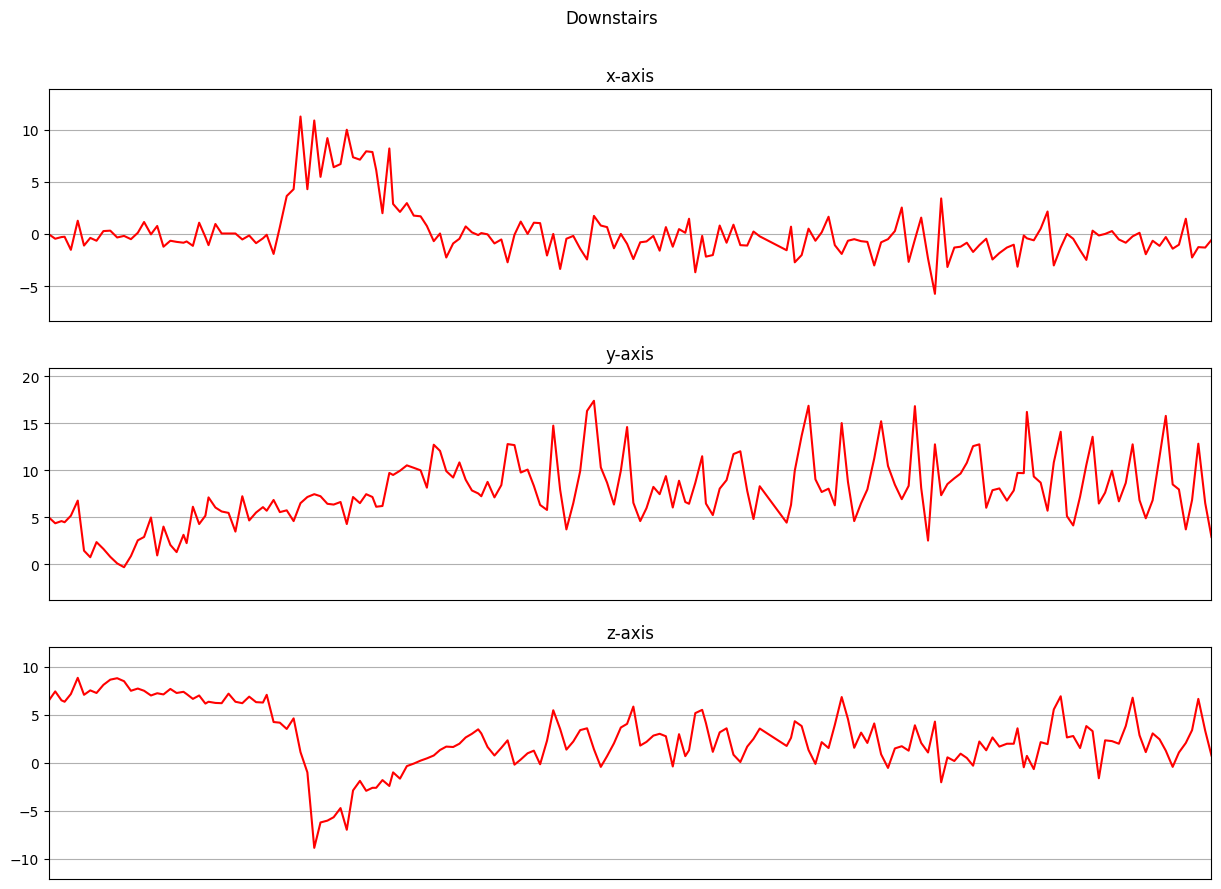

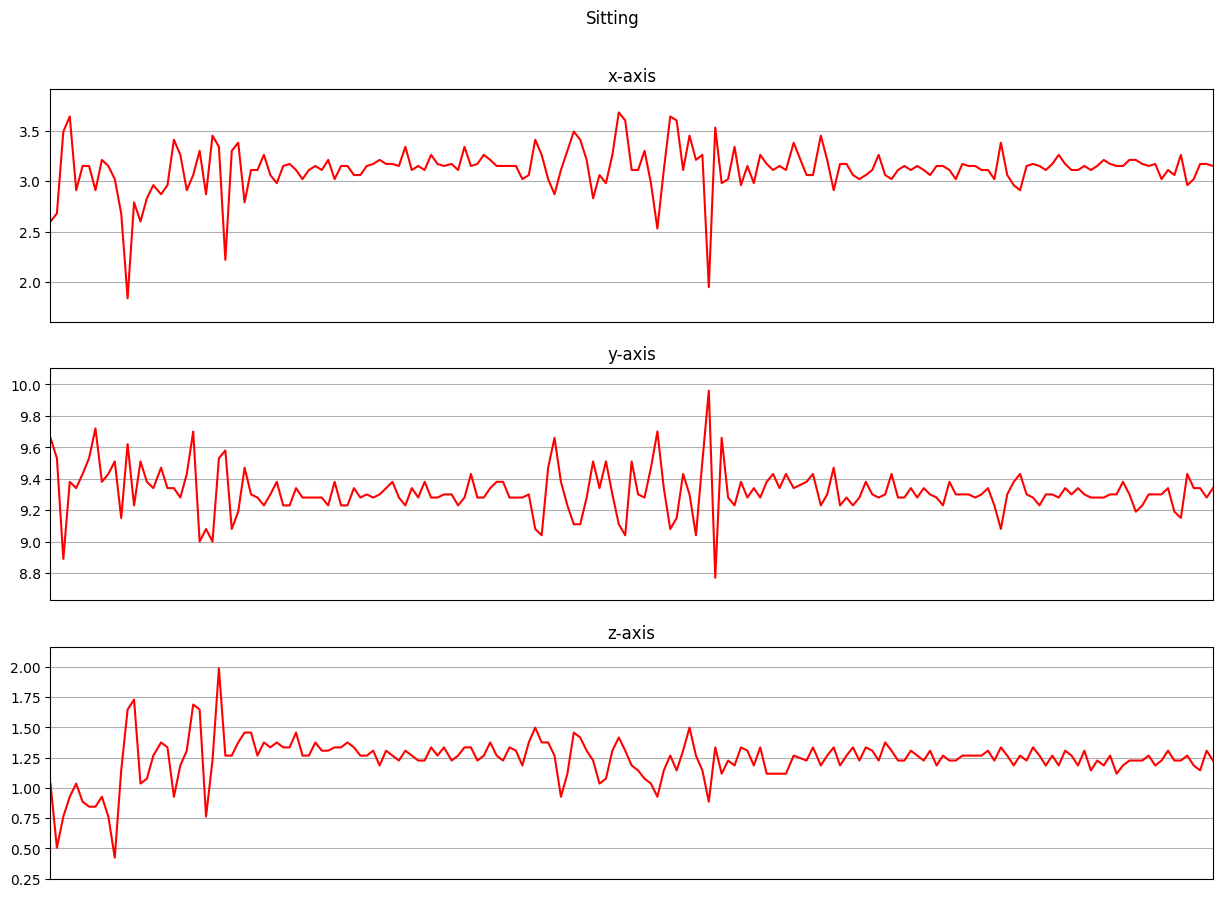

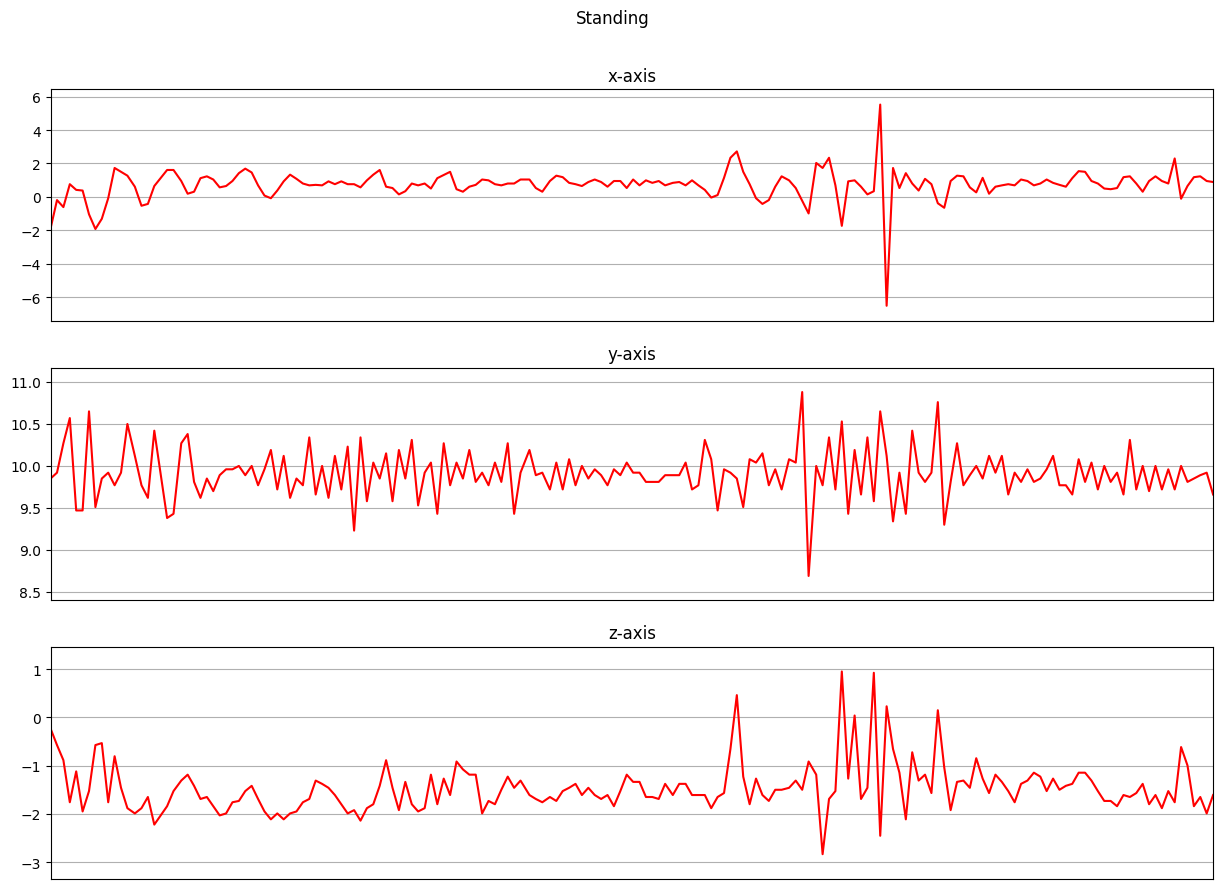

In [106]:
import numpy as np

def axis_plot(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in df_raw['activity'].unique():
    limit = df_raw[df_raw['activity'] == activity][:180]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
    axis_plot(ax0, limit['timestamp'], limit['x'], 'x-axis')
    axis_plot(ax1, limit['timestamp'], limit['y'], 'y-axis')
    axis_plot(ax2, limit['timestamp'], limit['z'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

In [107]:
# Prepare time series data for CNN by creating fixed-size windows
# Modified create_windows function to use pandas mode()
# 고정 크기 윈도우 생성을 통해 CNN용 시계열 데이터 준비
# pandas mode()를 사용하도록 수정된 create_windows 함수
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def create_windows(df, window_size, overlap_size):
    """
    Create sliding windows from the time series data.

    Args:
        df (pd.DataFrame): The input DataFrame with accelerometer data and activity labels.
        window_size (int): The number of data points in each window.
        overlap_size (int): The number of overlapping data points between consecutive windows.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - windows (np.ndarray): Shape (num_windows, window_size, num_features)
               - labels (np.ndarray): Shape (num_windows,)
    """
    """
    시계열 데이터에서 슬라이딩 윈도우를 생성합니다.

    인수(Args):
        df (pd.DataFrame): 가속도계 데이터 및 활동 레이블이 포함된 입력 DataFrame입니다.
        window_size (int): 각 윈도우의 데이터 포인트 수입니다.
        overlap_size (int): 연속된 윈도우 간에 겹치는 데이터 포인트 수입니다.

    반환(Returns):
        tuple: 두 개의 numpy 배열을 포함하는 튜플:
               - windows (np.ndarray): 형태 (윈도우 수, 윈도우 크기, 특징 수)
               - labels (np.ndarray): 형태 (윈도우 수,)
    """
    windows = []
    labels = []
    step_size = window_size - overlap_size
    num_samples = len(df)

    for i in range(0, num_samples - window_size + 1, step_size):
        # Extract window
        # 윈도우 추출
        window = df.iloc[i : i + window_size][['x', 'y', 'z']].values
        windows.append(window)

        # Extract encoded label (most frequent encoded activity in the window)
        # 윈도우의 인코딩된 레이블 추출 (윈도우에서 가장 자주 나타나는 인코딩된 활동)
        window_labels_encoded = df.iloc[i : i + window_size]['activity_encoded']
        # Use pandas mode() and take the first mode if multiple exist
        # pandas mode()를 사용하고 여러 개 있는 경우 첫 번째 mode를 가져옵니다.
        label_encoded = window_labels_encoded.mode()[0]
        labels.append(label_encoded)

    return np.array(windows), np.array(labels)

# Define window size and overlap
# 윈도우 크기 및 겹침 정의
window_size = 80  # Example: 50 data points per window # 예시: 윈도우당 50개 데이터 포인트
overlap_size = 40 # Example: 50% overlap # 예시: 50% 겹침

In [108]:
# Split data based on user ID
# 사용자 ID를 기준으로 데이터 분할
df_train = df_raw[df_raw['user'] <= 21].copy()
df_val = df_raw[(df_raw['user'] >= 22) & (df_raw['user'] <= 27)].copy()
df_test = df_raw[df_raw['user'] > 27].copy()

# Initialize LabelEncoder
# LabelEncoder 초기화
label_encoder = LabelEncoder()

# Fit and transform the labels for the entire dataset first to ensure consistent mapping
# 일관된 매핑을 위해 전체 데이터셋에 대해 레이블을 먼저 적합 및 변환합니다.
df_train['activity_encoded'] = label_encoder.fit_transform(df_train['activity'])
df_val['activity_encoded'] = label_encoder.transform(df_val['activity']) # Use the same encoder fitted on the training data
df_test['activity_encoded'] = label_encoder.transform(df_test['activity']) # Use the same encoder fitted on the training data


# Apply Min-Max Normalization to training, validation and test sets before creating windows
# 윈도우를 생성하기 전에 훈련, 검증 및 테스트 세트에 Min-Max Normalization을 적용합니다.
scaler = MinMaxScaler()

features_to_scale = ['x', 'y', 'z']

df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_val[features_to_scale] = scaler.transform(df_val[features_to_scale]) # Use the same scaler fitted on the training data # 훈련 데이터에 적합된 동일한 스케일러 사용
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale]) # Use the same scaler fitted on the training data # 훈련 데이터에 적합된 동일한 스케일러 사용


# Create windows and encoded labels for training, validation, and testing sets
# 훈련, 검증 및 테스트 세트에 대한 윈도우 및 인코딩된 레이블 생성
X_train, y_train = create_windows(df_train, window_size, overlap_size)
X_val, y_val = create_windows(df_val, window_size, overlap_size)
X_test, y_test = create_windows(df_test, window_size, overlap_size)


print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (15059, 80, 3)
Shape of y_train: (15059,)
Shape of X_val: (3713, 80, 3)
Shape of y_val: (3713,)
Shape of X_test: (6721, 80, 3)
Shape of y_test: (6721,)


In [109]:
# Display the first window and its label as an example for training data
# 훈련 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst training window example:")
print(X_train[0])
print(f"\nLabel of the first training window: {y_train[0]}")

# Display the first window and its label as an example for validation data
# 검증 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst validation window example:")
print(X_val[0])
print(f"\nLabel of the first validation window: {y_val[0]}")

# Display the first window and its label as an example for testing data
# 테스트 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst testing window example:")
print(X_test[0])
print(f"\nLabel of the first testing window: {y_test[0]}")

# Print the mapping of activities to encoded labels
# 활동과 인코딩된 레이블 매핑 출력
print("\nMapping of activities to encoded labels:")
for i, activity in enumerate(label_encoder.classes_):
    print(f"{activity}: {i}")


First training window example:
[[0.51016316 0.74190794 0.48893191]
 [0.49570273 0.75152636 0.48789509]
 [0.4898497  0.74293849 0.48478463]
 [0.49948999 0.74877826 0.48962312]
 [0.49948999 0.75049581 0.48685827]
 [0.51119605 0.74568661 0.48478463]
 [0.4984571  0.74671715 0.48962312]
 [0.49294836 0.74774772 0.48893191]
 [0.49363695 0.7498088  0.49273358]
 [0.50362154 0.74671715 0.48685827]
 [0.50431013 0.74671715 0.48789509]
 [0.50534302 0.74877826 0.48893191]
 [0.50258865 0.74774772 0.48962312]
 [0.50534302 0.74671715 0.48685827]
 [0.50844168 0.74774772 0.48685827]
 [0.50740879 0.74671715 0.49169676]
 [0.50844168 0.74671715 0.49169676]
 [0.50534302 0.74671715 0.4937704 ]
 [0.50362154 0.74568661 0.49273358]
 [0.50913027 0.74568661 0.49169676]
 [0.50913027 0.74568661 0.50137374]
 [0.51016316 0.74774772 0.49653525]
 [0.50534302 0.74671715 0.4937704 ]
 [0.50740879 0.74774772 0.49653525]
 [0.51326182 0.74671715 0.49480721]
 [0.50844168 0.74671715 0.4937704 ]
 [0.50913027 0.74568661 0.493770

## CNN 모델 구축

### Subtask:
활동 인식을 위한 CNN 모델을 정의하고 구축합니다.


**Reasoning**:
Import the necessary Keras layers and define the CNN model architecture based on the instructions.



In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Get input shape from the training data
# 훈련 데이터에서 입력 형태를 가져옵니다.
input_shape = X_train.shape[1:]
# Get the number of output classes from the label encoder
# 레이블 인코더에서 출력 클래스 수를 가져옵니다.
num_classes = len(label_encoder.classes_)

# Define the CNN model
# CNN 모델을 정의합니다.
model = Sequential()

# Add a Conv1D layer
# Conv1D 레이어를 추가합니다.
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
# Add a MaxPooling1D layer
# MaxPooling1D 레이어를 추가합니다.
model.add(MaxPooling1D(pool_size=2))

# Optional: Add more Conv1D and MaxPooling1D layers
# 선택 사항: Conv1D 및 MaxPooling1D 레이어 추가
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
# Flatten 레이어를 추가합니다.
model.add(Flatten())

# Add Dense layers
# Dense 레이어를 추가합니다.
model.add(Dense(units=100, activation='relu'))
# Add a Dropout layer for regularization (optional but recommended)
# 정규화를 위한 Dropout 레이어 추가 (선택 사항이지만 권장)
model.add(Dropout(0.5))

# Add the output Dense layer
# 출력 Dense 레이어를 추가합니다.
model.add(Dense(units=num_classes, activation='softmax'))

# Print the model summary
# 모델 요약 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 76, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 34, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │       217,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,418 (1017.26 KB)

 Trainable params: 260,418 (1017.26 KB)

 Non-trainable params: 0 (0.00 B)

## CNN 모델 컴파일

### Subtask:
손실 함수, 옵티마이저 및 평가 메트릭을 사용하여 모델을 컴파일합니다.


**Reasoning**:
Compile the CNN model with the specified loss function, optimizer, and metrics.



In [111]:
# Compile the model
# 모델을 컴파일합니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels # 정수 레이블에 대해 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) # 평가 지표: 정확도

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 76, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 34, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │       217,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,418 (1017.26 KB)

 Trainable params: 260,418 (1017.26 KB)

 Non-trainable params: 0 (0.00 B)

## CNN 모델 훈련

### Subtask:
훈련 데이터를 사용하여 CNN 모델을 훈련합니다.


**Reasoning**:
Train the compiled CNN model using the training data and validate it using the validation data, storing the training history.



In [112]:
# Define the number of epochs and batch size
# 에포크 수와 배치 크기를 정의합니다.
epochs = 50 # Increased epochs since Early Stopping will stop training when validation loss stops improving # 검증 손실 개선이 멈추면 Early Stopping이 훈련을 중단하므로 에포크를 늘렸습니다.
batch_size = 64

# Import EarlyStopping
# EarlyStopping 가져오기
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
# EarlyStopping 콜백 정의
# Monitor validation loss and stop training if it doesn't improve for 5 consecutive epochs
# 검증 손실을 모니터링하고 5 에포크 연속 개선되지 않으면 훈련을 중단합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
# 모델을 훈련합니다.
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] # Add EarlyStopping callback # EarlyStopping 콜백 추가
)

# Print training and validation accuracy and loss from the history
# 기록에서 훈련 및 검증 정확도와 손실을 출력합니다.
print("\nTraining History:")
print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
print("---------------------------------------------------")
for epoch in range(len(history.history['loss'])): # Iterate through the actual number of epochs run # 실제로 실행된 에포크 수만큼 반복
    print(
        f"{epoch + 1:<5} | "
        f"{history.history['loss'][epoch]:<10.4f} | "
        f"{history.history['accuracy'][epoch]:<9.4f} | "
        f"{history.history['val_loss'][epoch]:<9.4f} | "
        f"{history.history['val_accuracy'][epoch]:<8.4f}"
    )

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5966 - loss: 1.1174 - val_accuracy: 0.7118 - val_loss: 0.7775
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.6145 - val_accuracy: 0.6943 - val_loss: 0.7983
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8156 - loss: 0.4779 - val_accuracy: 0.7616 - val_loss: 0.6766
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8430 - loss: 0.3891 - val_accuracy: 0.7595 - val_loss: 0.7688
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8611 - loss: 0.3513 - val_accuracy: 0.7019 - val_loss: 0.8562
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8837 - loss: 0.3018 - val_accuracy: 0.7369 - val_loss: 0.9725
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8946 - loss: 0.2690 - val_accuracy: 0.7719 - val_loss: 0.8192
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8947 - loss: 0.2669 - val_accuracy: 0

## CNN 모델 평가

### Subtask:
테스트 데이터에서 훈련된 모델의 성능을 평가합니다.

**Reasoning**:
Evaluate the trained CNN model on the test data to assess its performance on unseen data and print the evaluation results (loss and accuracy).

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.7128

Test Loss: 0.8840
Test Accuracy: 0.7813
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix (text format):
[[ 245   15    0    0  195  249]
 [   9 1623    0    0   60   45]
 [   0    0  388    1   37    0]
 [   0    0    6  358   29    1]
 [ 144   21    1   52  337  223]
 [  29  275    0    0   78 2300]]


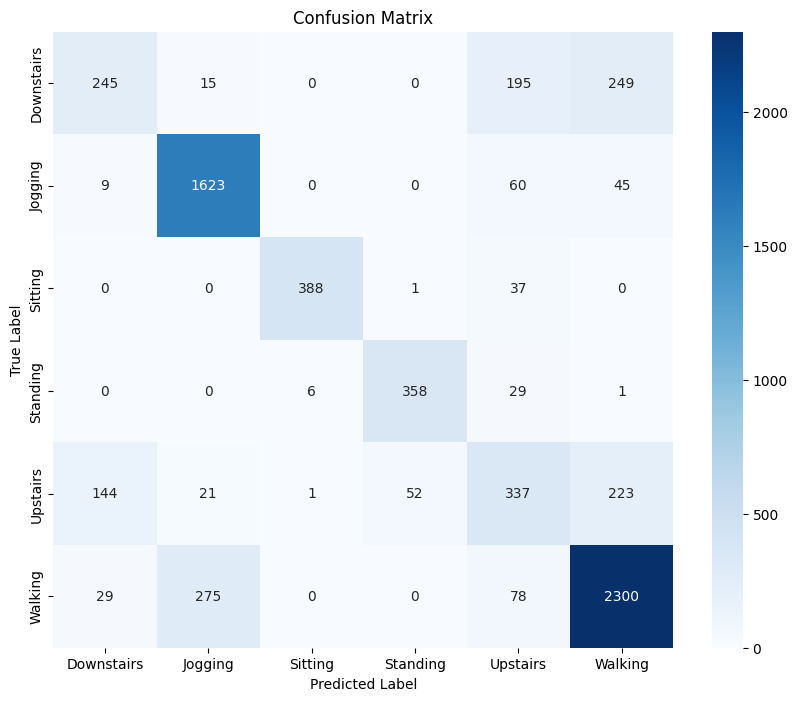

In [113]:
# Evaluate the model on the test data
# 테스트 데이터에서 모델을 평가합니다.
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
# 평가 결과를 출력합니다.
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test data
# 테스트 데이터에 대한 예측 결과를 가져옵니다.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
# 컨퓨전 매트릭스를 생성합니다.
cm_after_smote = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix in text format
# 컨퓨전 매트릭스를 텍스트 형식으로 출력합니다.
print("Confusion Matrix (text format):")
print(cm_after_smote)

# Get the activity class names from the label encoder
# 레이블 인코더에서 활동 클래스 이름을 가져옵니다.
activity_classes = label_encoder.classes_

# Plot the confusion matrix (optional, can be removed if only text is desired)
# 컨퓨전 매트릭스를 플롯합니다 (선택 사항, 텍스트만 원하는 경우 제거 가능).
plt.figure(figsize=(10, 8))
sns.heatmap(cm_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=activity_classes, yticklabels=activity_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 훈련 기록 시각화

### Subtask:
훈련 및 검증 데이터에 대한 모델의 정확도 및 손실 그래프를 그립니다.

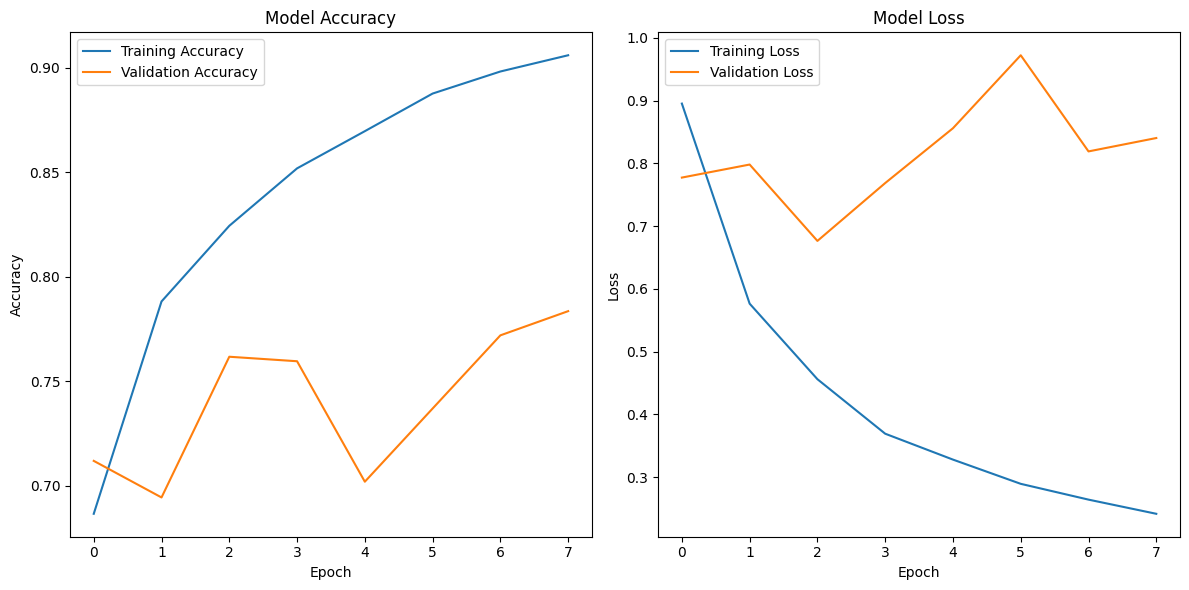

In [115]:
import matplotlib.pyplot as plt

# Plot training history
# 훈련 기록 플롯
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## SMOTE를 사용한 데이터 불균형 처리

### Subtask:
훈련 데이터에 SMOTE를 적용하여 클래스 불균형을 해소합니다.

In [116]:
# Apply SMOTE to the training data to handle class imbalance
# 클래스 불균형 처리를 위해 훈련 데이터에 SMOTE를 적용합니다.
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas to display value counts

# Reshape the training data for SMOTE
# SMOTE를 위해 훈련 데이터를 재구성합니다.
# SMOTE expects 2D data, so we need to flatten the window dimension.
# SMOTE는 2D 데이터를 예상하므로 윈도우 차원을 평면화해야 합니다.
num_windows_train, window_size, num_features = X_train.shape
X_train_reshaped = X_train.reshape(num_windows_train, -1)

# Initialize SMOTE
# SMOTE를 초기화합니다.
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
# 훈련 데이터에 SMOTE를 적용합니다.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)

# Reshape the resampled training data back to the original window structure
# 리샘플링된 훈련 데이터를 원래 윈도우 구조로 다시 재구성합니다.
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], window_size, num_features)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("\nShape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

# Check the class distribution after SMOTE
# SMOTE 적용 후 클래스 분포를 확인합니다.
print("\nClass distribution after SMOTE:")
display(pd.Series(y_train_resampled).value_counts())

Shape of X_train before SMOTE: (15059, 80, 3)
Shape of y_train before SMOTE: (15059,)

Shape of X_train after SMOTE: (36438, 80, 3)
Shape of y_train after SMOTE: (36438,)

Class distribution after SMOTE:


5    6073
1    6073
4    6073
0    6073
2    6073
3    6073
Name: count, dtype: int64

## CNN 모델 구축 (SMOTE)

### Subtask:
활동 인식을 위한 CNN 모델을 정의하고 구축합니다.


In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Get input shape from the training data
# 훈련 데이터에서 입력 형태를 가져옵니다.
input_shape = X_train_resampled.shape[1:]
# Get the number of output classes from the label encoder
# 레이블 인코더에서 출력 클래스 수를 가져옵니다.
num_classes = len(label_encoder.classes_)

# Define the CNN model
# CNN 모델을 정의합니다.
model = Sequential()

# Add a Conv1D layer
# Conv1D 레이어를 추가합니다.
model.add(Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=input_shape))
# Add a MaxPooling1D layer
# MaxPooling1D 레이어를 추가합니다.
model.add(MaxPooling1D(pool_size=2))

# Optional: Add more Conv1D and MaxPooling1D layers
# 선택 사항: Conv1D 및 MaxPooling1D 레이어 추가
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
# Flatten 레이어를 추가합니다.
model.add(Flatten())

# Add Dense layers
# Dense 레이어를 추가합니다.
model.add(Dense(units=100, activation='relu'))
# Add a Dropout layer for regularization (optional but recommended)
# 정규화를 위한 Dropout 레이어 추가 (선택 사항이지만 권장)
model.add(Dropout(0.5))

# Add the output Dense layer
# 출력 Dense 레이어를 추가합니다.
model.add(Dense(units=num_classes, activation='softmax'))

# Print the model summary
# 모델 요약 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)              │ (None, 76, 16)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 38, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 34, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        54,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,954 (226.38 KB)

 Trainable params: 57,954 (226.38 KB)

 Non-trainable params: 0 (0.00 B)

## CNN 모델 컴파일 (SMOTE)

### Subtask:
손실 함수, 옵티마이저 및 평가 메트릭을 사용하여 모델을 컴파일합니다.


In [118]:
# Compile the model
# 모델을 컴파일합니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels # 정수 레이블에 대해 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) # 평가 지표: 정확도

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)              │ (None, 76, 16)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 38, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 34, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        54,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,954 (226.38 KB)

 Trainable params: 57,954 (226.38 KB)

 Non-trainable params: 0 (0.00 B)

## CNN 모델 훈련 (SMOTE)

### Subtask:
훈련 데이터를 사용하여 CNN 모델을 훈련합니다.


In [119]:
# Define the number of epochs and batch size
# 에포크 수와 배치 크기를 정의합니다.
epochs = 50 # Increased epochs since Early Stopping will stop training when validation loss stops improving # 검증 손실 개선이 멈추면 Early Stopping이 훈련을 중단하므로 에포크를 늘렸습니다.
batch_size = 64

# Import EarlyStopping
# EarlyStopping 가져오기
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
# EarlyStopping 콜백 정의
# Monitor validation loss and stop training if it doesn't improve for 5 consecutive epochs
# 검증 손실을 모니터링하고 5 에포크 연속 개선되지 않으면 훈련을 중단합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
# 모델을 훈련합니다.
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] # Add EarlyStopping callback # EarlyStopping 콜백 추가
)

# Print training and validation accuracy and loss from the history
# 기록에서 훈련 및 검증 정확도와 손실을 출력합니다.
print("\nTraining History:")
print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
print("---------------------------------------------------")
for epoch in range(len(history.history['loss'])): # Iterate through the actual number of epochs run # 실제로 실행된 에포크 수만큼 반복
    print(
        f"{epoch + 1:<5} | "
        f"{history.history['loss'][epoch]:<10.4f} | "
        f"{history.history['accuracy'][epoch]:<9.4f} | "
        f"{history.history['val_loss'][epoch]:<9.4f} | "
        f"{history.history['val_accuracy'][epoch]:<8.4f}"
    )

Epoch 1/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5653 - loss: 1.0629 - val_accuracy: 0.7056 - val_loss: 0.7107
Epoch 2/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7386 - loss: 0.5897 - val_accuracy: 0.7180 - val_loss: 0.7322
Epoch 3/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7619 - loss: 0.5273 - val_accuracy: 0.7099 - val_loss: 0.7073
Epoch 4/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7948 - loss: 0.4512 - val_accuracy: 0.7148 - val_loss: 0.8216
Epoch 5/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8176 - loss: 0.4092 - val_accuracy: 0.7646 - val_loss: 0.8064
Epoch 6/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8426 - loss: 0.3743 - val_accuracy: 0.6383 - val_loss: 1.0951
Epoch 7/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.3423 - val_accuracy: 0.7379 - val_loss: 0.8926
Epoch 8/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8745 - loss: 0.3143 - val_accuracy: 0.

## CNN 모델 평가 (SMOTE)

### Subtask:
테스트 데이터에서 훈련된 모델의 성능을 평가합니다.

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7806 - loss: 0.8710

Test Loss: 1.2609
Test Accuracy: 0.7497
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix (text format):
[[ 388   36    0    0   34  246]
 [  26 1673    0    0   11   27]
 [   0    0  388    1   37    0]
 [   3    0   25  332   33    1]
 [ 406   72    0    5   79  216]
 [ 219  282    0    0    2 2179]]


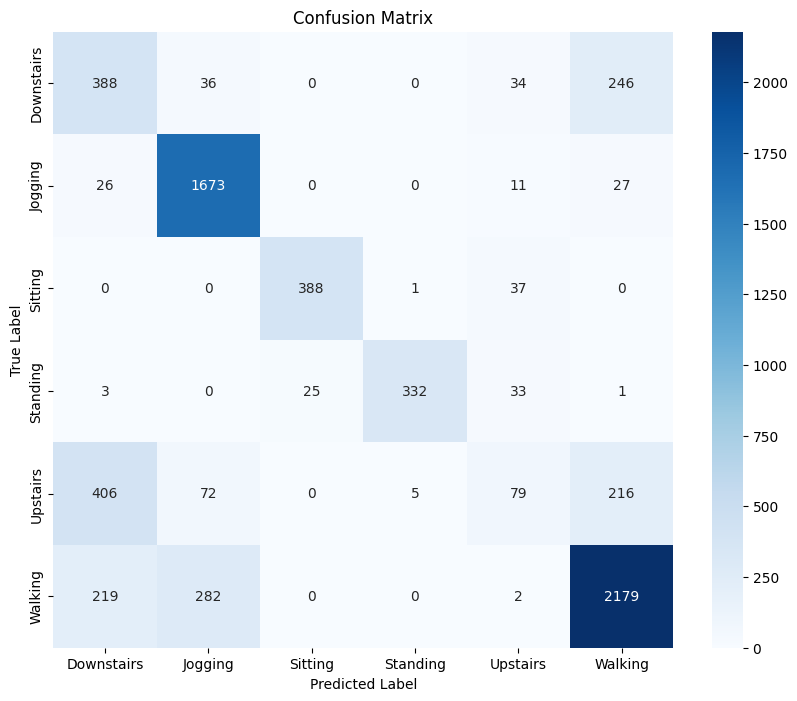

In [120]:
# Evaluate the model on the test data
# 테스트 데이터에서 모델을 평가합니다.
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
# 평가 결과를 출력합니다.
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test data
# 테스트 데이터에 대한 예측 결과를 가져옵니다.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
# 컨퓨전 매트릭스를 생성합니다.
cm_after_smote = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix in text format
# 컨퓨전 매트릭스를 텍스트 형식으로 출력합니다.
print("Confusion Matrix (text format):")
print(cm_after_smote)

# Get the activity class names from the label encoder
# 레이블 인코더에서 활동 클래스 이름을 가져옵니다.
activity_classes = label_encoder.classes_

# Plot the confusion matrix (optional, can be removed if only text is desired)
# 컨퓨전 매트릭스를 플롯합니다 (선택 사항, 텍스트만 원하는 경우 제거 가능).
plt.figure(figsize=(10, 8))
sns.heatmap(cm_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=activity_classes, yticklabels=activity_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 훈련 기록 시각화

### Subtask:
훈련 및 검증 데이터에 대한 모델의 정확도 및 손실 그래프를 그립니다.

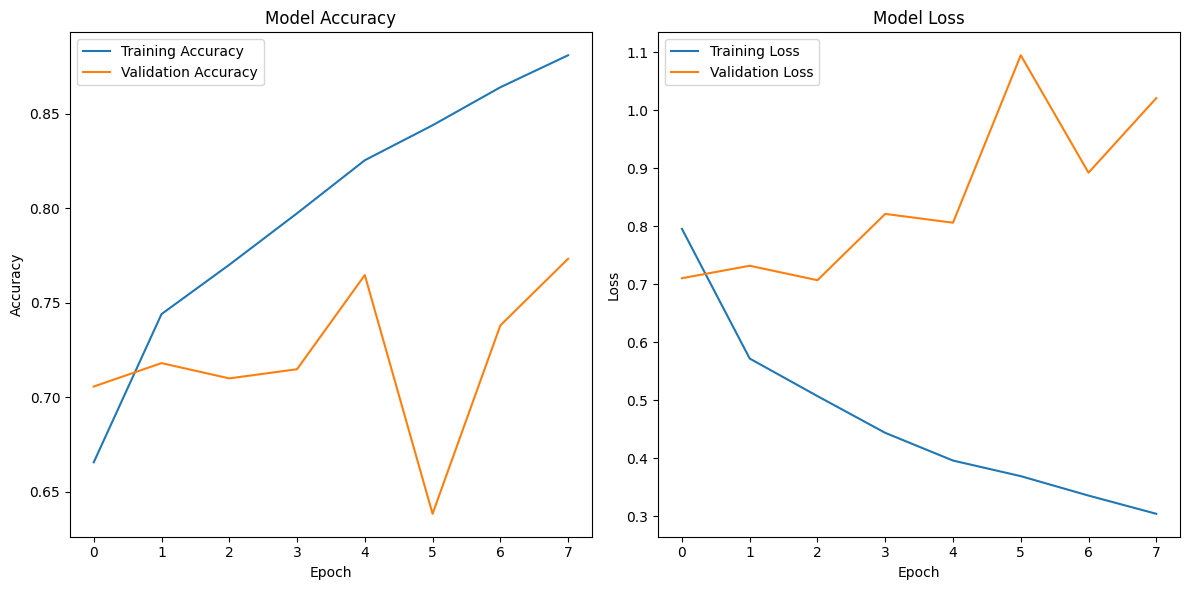

In [123]:
import matplotlib.pyplot as plt

# Plot training history
# 훈련 기록 플롯
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 클래스별 성능 지표 계산
### Subtask:
SMOTE 적용 전후의 컨퓨전 매트릭스를 사용하여 각 활동 클래스별 정밀도, 재현율, F1-score를 계산합니다.

In [122]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd # Import pandas to display DataFrames

# Get the activity class names (assuming the same order as in label_encoder.classes_)
# 활동 클래스 이름을 가져옵니다 (label_encoder.classes_와 동일한 순서라고 가정).
# Make sure label_encoder is available in the notebook environment.
# label_encoder가 노트북 환경에서 사용 가능한지 확인합니다.
activity_classes = label_encoder.classes_


# Function to calculate per-class metrics from a confusion matrix
# 컨퓨전 매트릭스에서 클래스별 지표를 계산하는 함수
def get_classification_metrics(cm, classes):
    """
    Calculates precision, recall, and f1-score from a confusion matrix.

    Args:
        cm (np.ndarray): Confusion matrix.
        classes (list): List of class names.

    Returns:
        pd.DataFrame: DataFrame containing per-class metrics.
    """
    """
    컨퓨전 매트릭스에서 정밀도, 재현율, F1-score를 계산합니다.

    인수(Args):
        cm (np.ndarray): 컨퓨전 매트릭스.
        classes (list): 클래스 이름 목록.

    반환(Returns):
        pd.DataFrame: 클래스별 지표를 포함하는 DataFrame.
    """
    metrics = {}
    for i, class_name in enumerate(classes):
        # True Positives (TP): diagonal element for the class
        # True Positives (TP): 해당 클래스의 대각선 요소
        tp = cm[i, i]

        # False Positives (FP): sum of the column excluding TP
        # False Positives (FP): TP를 제외한 열의 합계
        fp = np.sum(cm[:, i]) - tp

        # False Negatives (FN): sum of the row excluding TP
        # False Negatives (FN): TP를 제외한 행의 합계
        fn = np.sum(cm[i, :]) - tp

        # Precision: TP / (TP + FP)
        # 정밀도: TP / (TP + FP)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0

        # Recall: TP / (TP + FN)
        # 재현율: TP / (TP + FN)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
        # F1-score: 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics[class_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

    return pd.DataFrame(metrics).T

# Calculate metrics before SMOTE
# SMOTE 적용 전 지표 계산
metrics_before_smote = get_classification_metrics(cm_before_smote, activity_classes)
print("Classification Metrics Before SMOTE:")
display(metrics_before_smote)

# Calculate metrics after SMOTE
# SMOTE 적용 후 지표 계산
metrics_after_smote = get_classification_metrics(cm_after_smote, activity_classes)
print("\nClassification Metrics After SMOTE:")
display(metrics_after_smote)

# Compare metrics
# 지표 비교
metrics_comparison = metrics_after_smote - metrics_before_smote
print("\nChange in Classification Metrics (After SMOTE - Before SMOTE):")
display(metrics_comparison)

Classification Metrics Before SMOTE:


Precision    Recall  F1-score
Downstairs   0.372361  0.551136  0.444444
Jogging      0.810955  0.963155  0.880526
Sitting      0.939467  0.910798  0.924911
Standing     0.982249  0.842640  0.907104
Upstairs     0.403061  0.101542  0.162218
Walking      0.816411  0.812453  0.814427


Classification Metrics After SMOTE:


Precision    Recall  F1-score
Downstairs   0.372361  0.551136  0.444444
Jogging      0.810955  0.963155  0.880526
Sitting      0.939467  0.910798  0.924911
Standing     0.982249  0.842640  0.907104
Upstairs     0.403061  0.101542  0.162218
Walking      0.816411  0.812453  0.814427


Change in Classification Metrics (After SMOTE - Before SMOTE):


Precision  Recall  F1-score
Downstairs        0.0     0.0       0.0
Jogging           0.0     0.0       0.0
Sitting           0.0     0.0       0.0
Standing          0.0     0.0       0.0
Upstairs          0.0     0.0       0.0
Walking           0.0     0.0       0.0